# Integer Summations

We started our class discussing integer summations.  These are important as they will help us resolve our first problems dealing with calculating areas and volumes of more complex regions and solids.  In this notebook, we want to introduce some different ways to investigate and compute summations with the notebooks. The focus will be on the summation $$1+2+3+...+n=\sum_{i=1}^{n}k$$   

First, we can see how to do this like we would with an old hand calculator by simply entering the values.

In [1]:
1+2

3

In [2]:
1+2+3

6

In [3]:
1+2+3+4

10

In [4]:
1+2+3+4+5

15

### Summing a list

Unless this yields an obvious pattern, we might find such an approach tedious.  Luckily, we can generate short lists and add them using the **numpy** command that we will type
`np.sum()`.  This will come from the **numpy** library which we will abbreviate as `np` by importing and renaming.  We do this because we're lazy.

In [5]:
import numpy as np

In [6]:
a=[1]
b=[1,2]
c=[1,2,3]
d=[1,2,3,4]
e=[1,2,3,4,5]

In [7]:
np.sum(a), np.sum(b), np.sum(c), np.sum(d), np.sum(e)

(1, 3, 6, 10, 15)

### Using Comprehensions

Despite saving ourselves from typing the addition signs, we maybe haven't really saved any work.  Luckily, we can create these lists using a list comprehension.  To do this, we will also need to understand the `range` function that lists a sequence of integers.  First we will show how to use the range function to generate a list of integers.  We will also see the `for` command here. Next, we use the range function to create a list comprehension that will give us a list of the first ten integers.



In [8]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
list(range(1,11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [10]:
list(range(1,11,2))

[1, 3, 5, 7, 9]

In [11]:
for i in range(1,11):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [12]:
A=[i for i in range(10)]
A

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
np.sum(A)

45

In [14]:
B = [i for i in range(1,11)]
B

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [15]:
np.sum(B)

55

In [16]:
C= [i**2 for i in range(1,11)]
C

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

#### Problems

1. Create a list of the first 10 odd integers using a **for** command
2. Sum the first 1, 2, 3, 4, and 5 odd integers
3. Create a list of the first 5 terms of the sum $$\sum_{k=1}^{5}\frac{1}{2^k}$$
4. Evaluate the sum $$\sum_{k=1}^{100}\frac{1}{2^k}$$

In [17]:
A = [i for i in range(1,20,2)]
A

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [18]:
A = list(range(1,21,2))

In [19]:
a= [2*i+1 for i in range(10)]
a

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [20]:
s = [1/(2**i) for i in range(1,101)]

### Graphing the sums

Now we may want to examine the sums graphically.  In order to do so, we can use a **for loop**.  These will be very important tools to run through lists of integers.

In [21]:
%matplotlib inline 
import matplotlib.pyplot as plt #imports and renames the pyplot functions from matplotlib


In [22]:
for i in range(1,10):
    partials=np.sum(range(1,i+1))
    print(i,partials)

1 1
2 3
3 6
4 10
5 15
6 21
7 28
8 36
9 45


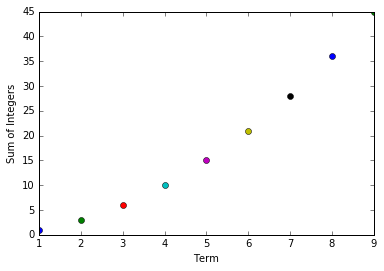

In [23]:
for i in range(1,10):
    a=i
    sum=np.sum(range(1,i+1))
    sum_graph= plt.plot(i,sum, 'o')
    plt.xlabel('Term')
    plt.ylabel('Sum of Integers')
 

#### Problems

1. Create an enumerated list of the sum $\sum_{k=1}^{4}\frac{1}{2^k}$
2. Graph this list
3. What do you think happens to the graph as we increase the number of terms?

### Making a pcolor visualization

This is a more advanced graphic that we saw in our lecture and in our reading that creates a rectangular grid that helps us understand the triangular numbers.  We use a **pcolor** graph as well as the **interact** feature to construct the image of the triangular numbers and then adjust how many terms we are including.  We will also use the **np.zeros** command to generate an $n$ by $n+1$ rectangular array that is updated as we change the number of terms we are summing.

In [24]:
from ipywidgets import interact, widgets, fixed 

In [25]:
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [26]:
def tri_numplot(n=4):
    plt.figure(figsize=(6.0, 6.0))
    a=np.zeros((n,n+1))#creates an n by n+1 array of zeros
    for i in range(n):
        for j in range(i+1):
            a[i,j]=1
    a=np.flipud(a)        
    plt.pcolor(a, edgecolors='k', linewidths=4)
    plt.axis('tight')
    plt.axis('off')
            

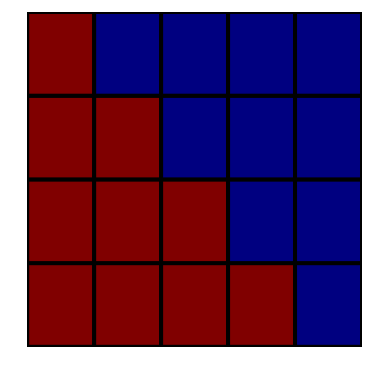

In [27]:
tri_numplot(4)

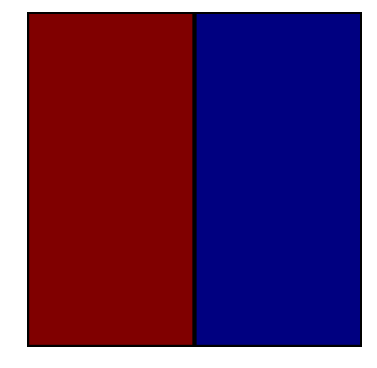

In [28]:
interact(tri_numplot, n=widgets.IntSlider(min=1, max=100, step=1, value=1));

### Symbolic Summations

The **sympy** library allows the use of symbolic computation, and will generate some expected solutions to the problems of Archimedes quadrature, and the sums of integers to powers.


In [29]:
from sympy import Symbol, summation, symbols, oo
i,n,m = symbols('i n m', integer=True)

In [30]:
summation(1/4**i, (i,1,n))

-4*4**(-n - 1)/3 + 1/3

In [31]:
summation(1/4**i, (i,1,oo))

1/3

In [32]:
summation(i, (i, 1, n))

n**2/2 + n/2

In [33]:
summation(i**2, (i, 1, n))

n**3/3 + n**2/2 + n/6

In [34]:
summation(i**3, (i, 1, n))

n**4/4 + n**3/2 + n**2/4

In [35]:
summation(i**4, (i, 1, n))

n**5/5 + n**4/2 + n**3/3 - n/30

### Patterns in Expressions

We can also use `sympy` to expand binomial expressions.  Here we look to see if there is a pattern in the coefficients.

In [40]:
from sympy import Symbol, expand
x= Symbol('x')
y = Symbol('y')
expr1 = (x + y)**1
expand(expr1)

x + y

In [41]:
expr2= (x+y)**2
expand(expr2)

x**2 + 2*x*y + y**2

In [42]:
from sympy import pprint
pprint(expand(expr2))

 2            2
x  + 2⋅x⋅y + y 


#### Continue the Work

Continue to expand expressions 

$$(x+y)^n \quad \text{for} \quad n=1,2,3,4,\text{and} \quad 5.$$

Do you recognize the pattern in coefficients?


In [44]:
expr3 = (x+y)**3
pprint(expand(expr3))

 3      2          2    3
x  + 3⋅x ⋅y + 3⋅x⋅y  + y 
